In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('sps3.csv')

In [3]:
print(df)

    Temperature    RD  Grain_size  Hardness     FT        RH
0          1175  93.7       0.800    15.310  5.192  0.729048
1          1200  95.2       0.900    18.500  3.700  0.880952
2          1225  98.2       1.000    20.600  4.500  0.980952
3          1250  99.3       1.600    21.000  3.600  1.000000
4          1300  99.8       4.400    19.200  3.200  0.914286
..          ...   ...         ...       ...    ...       ...
81         1700  99.0       3.268    12.309  2.800  1.414828
82         1700  97.5       3.268    12.191  3.400  1.401264
83         1700  95.5       3.268    11.329  4.000  1.302184
84         1700  98.0       3.268    12.230  5.192  1.405747
85         1700  96.9       3.268    11.799  5.192  1.356207

[86 rows x 6 columns]


In [4]:
df.columns

Index(['Temperature', 'RD', 'Grain_size', 'Hardness', 'FT', 'RH'], dtype='object')

In [25]:
X=df.drop(['Hardness', 'FT','RH'],axis=1).values
y=df['Hardness'].values
#y=y.reshape(-1,1)
#y=df.drop(['Temperature', 'RD', 'Grain_size','Hardness'],axis=1).values

# Split

In [26]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X)  
X = scaler.transform(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Models

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
#model.fit(X,y)
y_pred=model.predict(X_test)
accuracy=r2_score(y_test, y_pred)
print(accuracy)

0.08605641373959372


In [29]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
accuracy=r2_score(y_test, y_pred)
print(accuracy)

0.07647272250098391


In [30]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
accuracy=r2_score(y_test, y_pred)
print(accuracy)

0.45515196095684296


In [69]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=r2_score(y_test, y_pred)
print(accuracy)

0.5660697320739481


In [118]:
from sklearn.tree import DecisionTreeRegressor
clff = tree.DecisionTreeRegressor(max_depth=10)
clff.fit(X_train,y_train)
y_pred=clff.predict(X_test)
accuracy=r2_score(y_test, y_pred)
print(accuracy)

0.5613177570082093


In [90]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=70, 
                  activation='relu', 
                  solver='adam', 
                  alpha=0.001, 
                  batch_size='auto', 
                  learning_rate='constant', 
                  learning_rate_init=1, 
                  power_t=0.5, 
                  max_iter=500, 
                  shuffle=True, 
                  random_state=None, 
                  tol=0.001, 
                  verbose=False, 
                  warm_start=False, 
                  momentum=0.9, 
                  nesterovs_momentum=True, 
                  early_stopping=False, 
                  validation_fraction=0.1, 
                  beta_1=0.9, 
                  beta_2=0.999, 
                  epsilon=1e-08, 
                  n_iter_no_change=10, 
                  max_fun=15000)
nn.fit(X_train,y_train)
y_pred=nn.predict(X_test)
accuracy=r2_score(y_test, y_pred)
print(accuracy)

0.6630923439511485


# Accuracy

In [24]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
accuracy=r2_score(y_test, y_pred)
print(accuracy)

0.08605641373959372


# Plot

In [103]:
y_pred=nn.predict(X_test)

Text(0.5, 1.0, 'Hardness and FT')

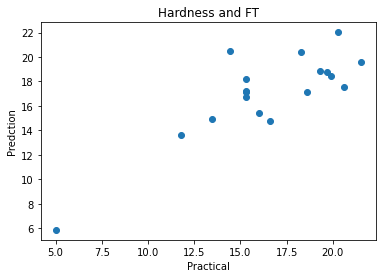

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter( y_test, y_pred)
plt.xlabel('Practical')
plt.ylabel('Predction')
plt.title('Hardness and FT')


In [67]:
z=[]
for i in X_test:
    z.append(i[0]) 

In [104]:
print(y_test,'\n',y_pred)

[20.6   15.31  20.3   19.3    5.027 15.31  18.6   19.7   14.435 11.799
 16.6   21.5   18.3   13.435 16.    15.31  15.31  19.9  ] 
 [17.57692389 18.19746179 22.02654777 18.82972612  5.86263519 17.20402394
 17.17130526 18.80668052 20.53105815 13.64189645 14.77718317 19.60110637
 20.42729825 14.93457048 15.42359993 17.17126417 16.70384486 18.45096066]
